In [5]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns

In [18]:
end = dt.datetime.now()
start = dt.date(end.year - 3,end.month,end.day)
ticker = ['1810.HK']

In [19]:
stock_prices = reader.get_data_yahoo(ticker, start, end)['Adj Close']
stock_prices.head()

Symbols,1810.HK
Date,
2018-11-28,14.50
2018-11-29,14.20
2018-11-30,14.28
2018-12-03,14.86
2018-12-04,14.64


In [30]:
stock_prices = stock_prices.resample('1M').last()
stock_prices.head()

Symbols,1810.HK
Date,
2018-12-31,12.94
2019-01-31,10.10
2019-02-28,11.92
2019-03-31,11.38
2019-04-30,12.02


In [31]:
stock_returns = stock_prices.pct_change()
stock_returns = stock_returns.dropna()
stock_returns.head()

Symbols,1810.HK
Date,
2019-01-31,-0.219474
2019-02-28,0.180198
2019-03-31,-0.045302
2019-04-30,0.056239
2019-05-31,-0.187188


In [45]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly.rename(columns={'date_ff_factors':'Date'}, inplace=True)
ff3_monthly.set_index('Date', inplace = True)
ff3_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-06-30,0.0275,0.0180,-0.0776,0.0000
2021-07-31,0.0127,-0.0396,-0.0175,0.0000
2021-08-31,0.0290,-0.0048,-0.0013,0.0000


In [46]:
stock_returns.rename(columns={'1810.HK':'Xiaomi'}, inplace=True)
data = ff3_monthly.merge(stock_returns, on = 'Date')
data.head()

,Mkt-RF,SMB,HML,RF,Xiaomi
Date,,,,,
2019-01-31,0.0841,0.0290,-0.0044,0.0021,-0.219474
2019-02-28,0.0340,0.0204,-0.0268,0.0018,0.180198
2019-03-31,0.0110,-0.0298,-0.0405,0.0019,-0.045302
2019-04-30,0.0396,-0.0174,0.0217,0.0021,0.056239
2019-05-31,-0.0694,-0.0134,-0.0237,0.0021,-0.187188


In [48]:
XIAOMI_excess_ret = data['Xiaomi'] - data['RF']
data['Xiaomi - RF'] = XIAOMI_excess_ret
data.head()

,Mkt-RF,SMB,HML,RF,Xiaomi,Xiaomi - RF
Date,,,,,,
2019-01-31,0.0841,0.0290,-0.0044,0.0021,-0.219474,-0.221574
2019-02-28,0.0340,0.0204,-0.0268,0.0018,0.180198,0.178398
2019-03-31,0.0110,-0.0298,-0.0405,0.0019,-0.045302,-0.047202
2019-04-30,0.0396,-0.0174,0.0217,0.0021,0.056239,0.054139
2019-05-31,-0.0694,-0.0134,-0.0237,0.0021,-0.187188,-0.189288


<AxesSubplot:xlabel='Mkt-RF', ylabel='Xiaomi - RF'>

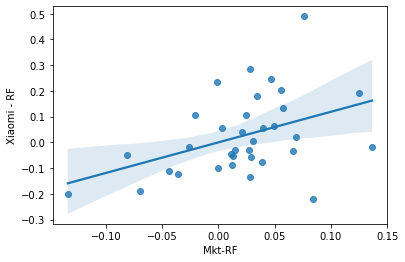

In [49]:
sns.regplot(x = 'Mkt-RF', y='Xiaomi - RF', data = data)

In [51]:
X = data['Mkt-RF']
y = data['Xiaomi - RF']

X1 = sm.add_constant(X)
model = sm.OLS(y,X1)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Xiaomi - RF   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.699
Date:                Sun, 28 Nov 2021   Prob (F-statistic):             0.0144
Time:                        19:47:36   Log-Likelihood:                 19.006
No. Observations:                  34   AIC:                            -34.01
Df Residuals:                      32   BIC:                            -30.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.52e-05      0.026     -0.001      1.000      -0.054       0.053
Mkt-RF         1.1897      0.460      2.588      0.014       0.253       2.126
==============================================================================
Omnibus:                        4.758   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.245
Skew:                           0.613   Prob(JB):                        0.197
Kurtosis:                       3.888   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
intercept, beta = results.params
beta

1.1896784201740074

In [53]:
risk_free = data['RF'].mean()
risk_free

0.0007558823529411764

In [54]:
market_premium = data['Mkt-RF'].mean()
market_premium

0.020791176470588243

In [55]:
xiaomi_exp_return = risk_free + beta*market_premium
xiaomi_exp_return = xiaomi_exp_return * 12
xiaomi_exp_return

0.3058883559603551